In [343]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
sns.set(color_codes=True)

In [7]:
def sample_gumbel(shape, eps=1e-20): 
    """Sample from Gumbel(0, 1)"""
    U = torch.distributions.Uniform(0,1)
    U = U.sample(shape)
    return -torch.log(-torch.log(U + eps) + eps)

In [198]:
# categorical parameters 
pi = torch.rand(10)
pi

tensor([0.5785, 0.8464, 0.4723, 0.5181, 0.9751, 0.7312, 0.5213, 0.7325, 0.7509,
        0.7778])

<StemContainer object of 3 artists>

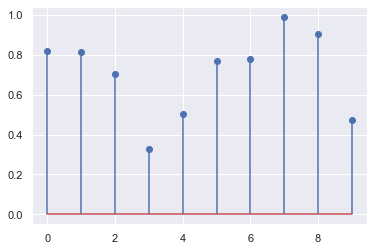

In [192]:
plt.stem(pi,use_line_collection=True)

In [199]:
gI 

tensor([[ 0.7267, -0.2114,  0.9889,  ...,  1.0544,  1.3622,  0.6137],
        [-0.6558, -0.0384, -0.0417,  ..., -0.1896, -0.4132, -1.6892],
        [ 0.5670, -1.2758, -0.0777,  ..., -0.6324, -0.5085, -0.5425],
        ...,
        [-1.1785, -0.8815,  0.2462,  ...,  2.5552,  3.6371,  2.2167],
        [-1.3577, -0.0474,  4.9420,  ...,  0.2001, -0.7104, -0.2280],
        [-0.1191,  0.9206,  1.1134,  ..., -0.8722, -0.3581,  0.8370]])

In [200]:
g+pi

tensor([[ 1.3052,  0.6350,  1.4612,  ...,  1.7869,  2.1131,  1.3915],
        [-0.0773,  0.8081,  0.4306,  ...,  0.5430,  0.3377, -0.9113],
        [ 1.1455, -0.4293,  0.3946,  ...,  0.1001,  0.2423,  0.2353],
        ...,
        [-0.6000, -0.0350,  0.7184,  ...,  3.2878,  4.3879,  2.9945],
        [-0.7792,  0.7991,  5.4143,  ...,  0.9327,  0.0404,  0.5498],
        [ 0.4594,  1.7670,  1.5857,  ..., -0.1397,  0.3928,  1.6148]])

In [193]:
N = 10000
g = sample_gumbel([N, 10])

# z = np.argmax(g + pi[None], 1)
# z

tensor([[ 0.5232, -0.4207,  0.6371,  ...,  1.0439,  1.2619, -0.1352],
        [-0.8593, -0.2477, -0.3935,  ..., -0.2001, -0.5135, -2.4380],
        [ 0.3635, -1.4850, -0.4295,  ..., -0.6430, -0.6088, -1.2914],
        ...,
        [-1.3820, -1.0908, -0.1057,  ...,  2.5447,  3.5368,  1.4678],
        [-1.5612, -0.2566,  4.5902,  ...,  0.1896, -0.8107, -0.9769],
        [-0.3226,  0.7113,  0.7616,  ..., -0.8828, -0.4584,  0.0881]])

In [185]:
temp = np.zeros((N,10))
for i, cols in enumerate(z):
    temp[i, cols] = 1

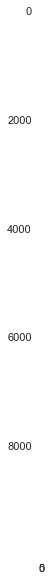

In [186]:
plt.figure(figsize=(10,10))
plt.imshow(temp)

<StemContainer object of 3 artists>

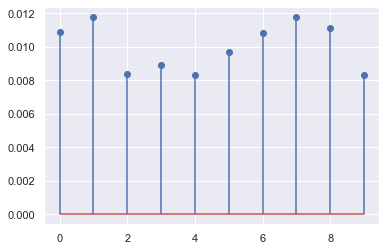

In [191]:
plt.stem(np.mean(temp,0),use_line_collection=True)

<StemContainer object of 3 artists>

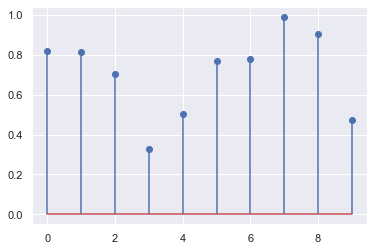

In [189]:
plt.stem(pi,use_line_collection=True)

In [130]:
import numpy as np

In [133]:
znp.argmax(z, 1)

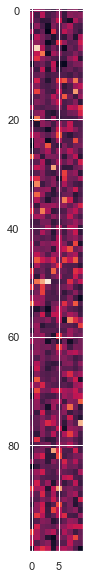

In [129]:
plt.figure(figsize=(10,10))
plt.imshow(z)

tensor([ 0.3177, -0.5330,  0.6735,  3.4394, -0.6509,  1.2428,  0.1095,  2.0857,
         0.1895,  1.3065])


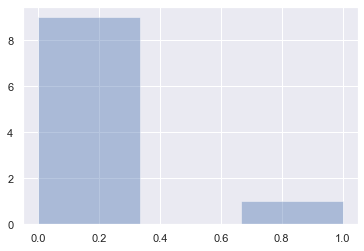

In [113]:
x = sample_gumbel([10])
tau = torch.autograd.Variable(torch.tensor(1),name="temperature")

l,r = 0,1
logits = l + torch.rand(10) * (r - l)
# logits = torch.distributions.Categorical(torch.tensor([.1,.9,.2]))

y = logits + sample_gumbel(logits.shape)
m = torch.nn.Softmax(dim=0)

# gumbel softmax (gsm) sample z
z_gsm = m(y/tau)
sns.distplot(gsm,kde=False);

print(x)

A = torch.arange(1,10)
N_01 = torch.distributions.Normal(0,1)
eps= N_01.sample()
mu = torch.mean(gsm)
    
# reparametrize 
# y = A* x + mu


# y
# sample_gumbel(logits)

<h4>Linear Transformation of Gaussian random variables<h4>
$$x \sim N(\mu_x, \Sigma_x)$$
The black scatter shows the distribution of x 

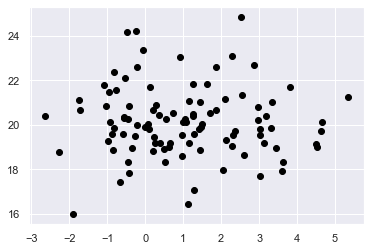

In [348]:
# linear transformation of Normal identities
mux1= torch.FloatTensor([1,20])
sigmax1 = torch.FloatTensor([[3,0],[0,3]])
dist1 = torch.distributions.MultivariateNormal(mux1,sigmax1)

X_sample1 = dist1.sample([100,])

x_s1 = X_sample1[:,0]
y_s1 = X_sample1[:,1]

plt.scatter(x_s1,y_s1,color='black')

transformed_x $= Ax + b$ 

The red scatter shows the samples from X and black show samples from transformed_x

torch.Size([2, 1]) torch.Size([2, 2])
torch.Size([2, 100])


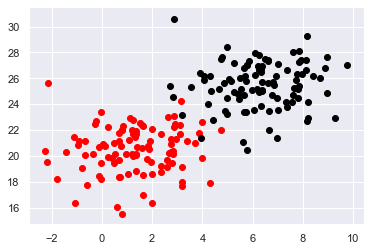

In [281]:
A = torch.FloatTensor([[1,0],[0,1]])
b = torch.FloatTensor([[5,5]]).view(2,-1)

# X_sample1 = X_sample1.view(2,-1)
X_sample1_t = X_sample1.t()
print(X_sample1_t.shape)

# plot the original distribution 
plt.scatter(X_sample1_t[0,:],X_sample1_t[1,:],color='red')

transformed_x = torch.mm(A,X_sample1_t)+b
x_s1_tr = transformed_x[0,:]
y_s1_tr = transformed_x[1,:]

# plot the transformed distribution
plt.scatter(x_s1_tr,y_s1_tr,color='black') 


<h2>Applying linear gaussian identity to analytically compute the transformed mean and variance <h2>
Plotting the distribution with this computed mean and var in red and plotting the transformed distribution in black 

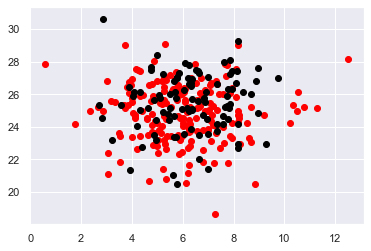

In [282]:
# analytically compute the new mean and variance of the transformed distribution
mu_tr_given_x = torch.mm(A,mux1.view(2,1))+b
sigma_tr_given_x = torch.mm(torch.mm(A,sigmax1),A.t())
# The new distribution with above parameters
lin_gaus_identity_dist = torch.distributions.MultivariateNormal(mu_tr_given_x,sigma_tr_given_x)

lin_tran_sample = lin_gaus_identity_dist.sample([100,])
x_lin_tran = lin_tran_sample[:,0]
y_lin_tran = lin_tran_sample[:,1]

# plot the new distribution in red
plt.scatter(x_lin_tran,y_lin_tran,color='red')
# plot the transformed distribution in black
plt.scatter(x_s1_tr,y_s1_tr,color='black')

# they should be identical in their parameters

<h2>Gumbel Max Trick [Gumbel,1954;Madisson et.al. 2014]</h2><br>
The goal of the following script is to show that a categorical distribution $$z \sim Cat(\vec{\pi})$$ is roughly equivalent 
to sampling from $$z = \text{one_hot} (\text{ argmax}_i[log(\pi_i)+g_i] )$$ <br>i.e. even when a gumbel noise is added to the log     categorical probabilities we obtain a similar distribution to the categorical. 

(array([ 60.,  62.,  42.,  34., 555.,  43.,  46.,  54.,  58.,  46.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

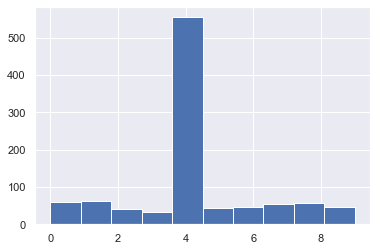

In [466]:
pi = [.05 for i in range(9)]
pi.insert(4,.55) # 
pi = torch.FloatTensor(pi)

cat_dist = torch.distributions.categorical.Categorical(pi)
c_s = cat_dist.sample([1000])
plt.hist(c_s)

(array([7.530e+02, 4.055e+03, 3.296e+03, 1.314e+03, 4.140e+02, 1.240e+02,
        2.900e+01, 7.000e+00, 6.000e+00, 2.000e+00]),
 array([-2.1942797, -0.9422919,  0.3096958,  1.5616835,  2.8136714,
         4.065659 ,  5.317647 ,  6.5696344,  7.8216224,  9.07361  ,
        10.325598 ], dtype=float32),
 <a list of 10 Patch objects>)

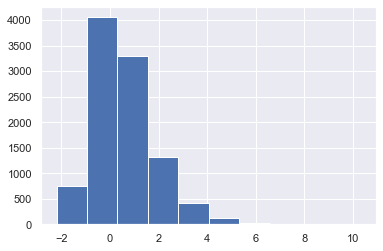

In [467]:
# Visualising Gumbel(0,1)
g_dist = torch.distributions.Gumbel(0,1)
g_s = g_dist.sample([10000,])

plt.hist(g_s)

Sampling from $g\sim$Gumbel$(0,1)$ and adding that as noise to $\pi=[\pi_1,\pi_2,\pi_3...\pi_k]$ Finally taking the argmax and doing this over and over again to simulate a new distribution of categorical probabilities that has added gumbel noise.

/Users/nihaar/Documents/virtual-envs/MLwPP/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

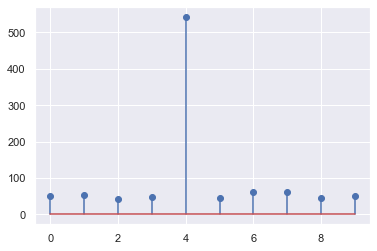

In [470]:
n = 1000
K = 10 # number of categories
one_hot = torch.zeros(K)

# pi = [.05 for i in range(10)]

for s in range(n):
    g = g_dist.sample([K]).numpy()
    
    g_plus_pi = [np.log(pi_i)+g_i for pi_i,g_i in zip(pi,g)]
#     print(g_plus_pi)
    
    v = torch.argmax(torch.Tensor(g_plus_pi))
    
    one_hot_i = torch.tensor([0 if i!= v else 1 for i in range(K)])
    one_hot += one_hot_i
    
plt.stem(one_hot)


/Users/nihaar/Documents/virtual-envs/MLwPP/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

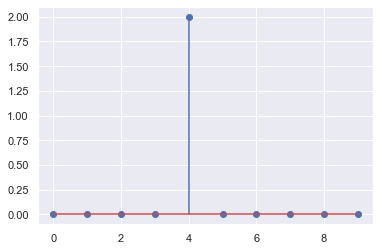

In [501]:
import torch
n = 100
K = 10 # number of categories
one_hot = torch.zeros(K)

tau = .1
m = torch.nn.Softmax(dim=0)

for s in range(n):
    g = g_dist.sample([K]).numpy()
    
    g_plus_pi = [np.log(pi_i)+g_i for pi_i,g_i in zip(pi,g)]
    g_plus_pi = [x/tau for x in g_plus_pi]
    
    y_i = m(torch.Tensor(g_plus_pi))
    y_i += y_i
    
plt.stem(y_i)

In [479]:
pi

tensor([0.0500, 0.0500, 0.0500, 0.0500, 0.5500, 0.0500, 0.0500, 0.0500, 0.0500,
        0.0500])